In [1]:
import base64
from PIL import Image
import io
import numpy as np
from deepface import DeepFace
from deepface.commons import functions
import cv2
import matplotlib.pyplot as plt
import os


# recognizer
model_name = 'Facenet512'
target_size = functions.find_target_size(model_name)

2023-11-03 01:14:19.327794: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 01:14:19.439960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 01:14:19.440127: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 01:14:19.440241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 01:14:19.470130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 01:14:19.471595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
def extractor(base64_string):
    # base64_string 전처리
    base64_string = base64_string.split(',')[1]
    # string -> base64
    img_data = base64.b64decode(base64_string)
    # base64 -> image
    img = np.array(Image.open(io.BytesIO(img_data)))

    # 사진 보기
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.show()

    try:
        # 얼굴 영역 추출
        face = DeepFace.extract_faces(img_path=img, target_size=target_size, detector_backend='ssd')
        face = face[0]['facial_area']
        x, y, w, h = face['x'], face['y'], face['w'], face['h']
        face = img[y:y + h, x:x + w]

        # 임베딩
        embedding_img = DeepFace.represent(img_path=face, model_name=model_name, detector_backend='skip')[0]['embedding']
        return embedding_img
    except:
        return None


''
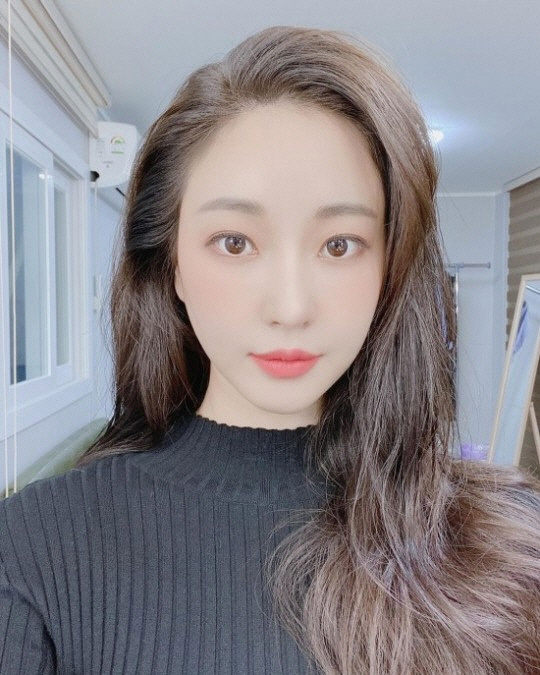

In [3]:
with open("base64.txt","r") as base:
    bases = base.readlines()[0]
bases

In [11]:
ret = extractor(bases)
ret
resultstr=''
for r in ret:
    resultstr += str(r)+'/'
resultstr = resultstr.rstrip('/')

In [12]:
vlist = resultstr.split('/')
print(len(vlist))

512
